# Load Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

# Nanog target gene expression after mutation

In [4]:
import os
os.chdir('/mnt/Storage/home/wangyiman/fitCUTRUN/analysis/TF/motif')

In [6]:
qPCR_df = pd.read_csv('mutation_genes_qPCR.txt', header = 0, sep = '\t')
order = []
for i in qPCR_df['Gene symbol'] :
    if i == 'foxa3 (site1&2)' :
        order.append(1)
    elif i == 'foxa3 (site1)' :
        order.append(2)
    elif i == 'foxa3 (site2)' :
        order.append(3)
    elif i == 'dharma' :
        order.append(4)
    elif i == 'fgfr4' :
        order.append(5)
    else :
        order.append(6)
        
        
qPCR_df['order'] = order
qPCR_df

,Targets,Relative expression,Gene symbol,order
0,chr5,1.092438,hist1h4l,6
1,chr5,0.925978,hist1h4l,6
2,chr5,1.336211,hist1h4l,6
3,chr15,0.493581,dharma,4
4,chr15,0.602828,dharma,4
5,chr15,0.652886,dharma,4
6,chr21,0.788883,fgfr4,5
7,chr21,0.803496,fgfr4,5
8,chr21,0.744158,fgfr4,5
9,chr18-1,1.246669,foxa3 (site1),2


In [9]:
qPCR_df.sort_values('order')['Gene symbol'].unique()

array(['foxa3 (site1&2)', 'foxa3 (site1)', 'foxa3 (site2)', 'dharma',
       'fgfr4', 'hist1h4l'], dtype=object)

## bar plot -- Fig.4F

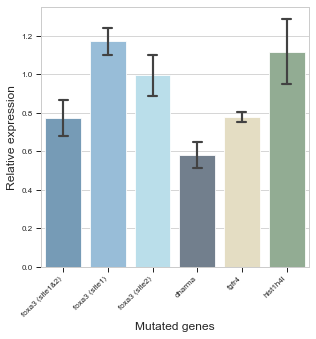

In [10]:
with sns.axes_style('whitegrid', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 8,
                             'ytick.labelsize': 8,
                             'legend.fontsize': 8
                         }):
    fig, ax = plt.subplots(figsize=(6.4 * .7, 4.8))
    sns.barplot(
        x='order',
        y='Relative expression',
        data=qPCR_df,
        palette=['#769BB6', '#98BDD8', '#BADEEA', '#727F8D', '#E4DDC3', '#92AC93',],
        ci='sd',
        saturation=1,
        capsize=.2,
        ax=ax,
    )
    ax.set_xticklabels(labels=qPCR_df.sort_values('order')['Gene symbol'].unique(),
                       rotation=45, ha = 'right')
    ax.set_ylabel('Relative expression')
    ax.set_xlabel('Mutated genes')
    fig.tight_layout()
    fig.savefig('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/figures/Fig4F_barplot_qPCR.pdf', transparent=True)